
# Palmeiras 2025 Historical Dominance Analysis
**Input:** clean_data.parquet (from data_cleaning.ipynb)
**Scope:** Through Quarter-Finals comparison

## Data Pipeline:
1. data_merging.ipynb → merged_raw.csv
2. data_cleaning.ipynb → clean_data.parquet  
3. analysis.ipynb (THIS NOTEBOOK) → insights & visualizations

## Analysis Structure:
- Phase 2A: Universal Era (2015-2025) - Traditional metrics
- Phase 2B: Modern Era (2019-2025) - Advanced metrics (xG)


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
path = r"C:\Users\Felipe\Football_Analytics_Portfolio\Libertadores_Process_Dominance\data\clean_data.parquet"
df = pd.read_parquet(path)

In [10]:
df.head(15)

,Date,Round,Venue,Result,GF,GA,Opponent,Poss,xG,xGA,Year,Champion,Stage
0,2015-02-19,Second stage,Away,L,0,2,bo San José,NaN,NaN,NaN,2015,River Plate,Group
1,2015-03-05,Second stage,Home,D,1,1,mx UANL,NaN,NaN,NaN,2015,River Plate,Group
2,2015-03-12,Second stage,Away,D,1,1,pe Juan Aurich,NaN,NaN,NaN,2015,River Plate,Group
3,2015-03-19,Second stage,Home,D,1,1,pe Juan Aurich,NaN,NaN,NaN,2015,River Plate,Group
4,2015-04-08,Second stage,Away,D,2,2,mx UANL,NaN,NaN,NaN,2015,River Plate,Group
5,2015-04-15,Second stage,Home,W,3,0,bo San José,NaN,NaN,NaN,2015,River Plate,Group
6,2015-05-07,Round of 16,Home,W,1,0,ar Boca Juniors,NaN,NaN,NaN,2015,River Plate,R16
7,2015-05-14,Round of 16,Away,W,3,0,ar Boca Juniors,NaN,NaN,NaN,2015,River Plate,R16
8,2015-05-21,Quarter-finals,Home,L,0,1,br Cruzeiro,NaN,NaN,NaN,2015,River Plate,QF
9,2015-05-27,Quarter-finals,Away,W,3,0,br Cruzeiro,NaN,NaN,NaN,2015,River Plate,QF


In [15]:
# Filter to only Group, R16, and QF stages
df_through_qf = df.query('Stage in ["Group", "R16", "QF", "SF"]').copy()

In [25]:
df_test = df_through_qf.query('Champion == "Palmeiras*"')

In [27]:
df_test.head(14)

,Date,Round,Venue,Result,GF,GA,Opponent,Poss,xG,xGA,Year,Champion,Stage
134,2025-04-03,Group stage,Away,W,3,2,Sporting Cristal,60.0,3.4,0.9,2025,Palmeiras*,Group
135,2025-04-09,Group stage,Home,W,1,0,Cerro Porteño,57.0,3.0,0.2,2025,Palmeiras*,Group
136,2025-04-24,Group stage,Away,W,3,2,Bolivar,25.0,2.5,1.5,2025,Palmeiras*,Group
137,2025-05-07,Group stage,Away,W,2,0,Cerro Porteño,54.0,1.6,0.7,2025,Palmeiras*,Group
138,2025-05-15,Group stage,Home,W,2,0,Bolivar,51.0,1.4,0.2,2025,Palmeiras*,Group
139,2025-05-28,Group stage,Home,W,6,0,Sporting Cristal,53.0,2.7,0.2,2025,Palmeiras*,Group
140,2025-08-14,Round of 16,Away,W,4,0,Universitario,52.0,3.0,0.7,2025,Palmeiras*,R16
141,2025-08-21,Round of 16,Home,D,0,0,Universitario,65.0,0.9,0.7,2025,Palmeiras*,R16
142,2025-09-17,Quarter-finals,Away,W,2,1,River Plate,34.0,0.9,0.6,2025,Palmeiras*,QF
143,2025-09-24,Quarter-finals,Home,W,3,1,River Plate,57.0,2.0,0.7,2025,Palmeiras*,QF


In [14]:
# Verify the filter worked
print("=" * 50)
print("DATASET: THROUGH QUARTER-FINALS")
print("=" * 50)
print(f"Total matches: {len(df_through_qf)}")
print(f"\nStage distribution:")
print(df_through_qf['Stage'].value_counts())
print(f"\nMatches per champion:")
print(df_through_qf.groupby('Champion').size().sort_index())

DATASET: THROUGH QUARTER-FINALS
Total matches: 130

Stage distribution:
Stage
Group    66
R16      22
QF       22
SF       20
Name: count, dtype: int64

Matches per champion:
Champion
Atlético Nacional    12
Botafogo             12
Flamengo             24
Fluminense           12
Grêmio               12
Palmeiras            24
Palmeiras*           10
River Plate          24
dtype: int64


In [6]:
# Create a unique identifier: "Champion Year"
df_through_qf['Champion_Year'] = df_through_qf['Champion'].str.replace('*', '') + ' ' + df_through_qf['Year'].astype(str)

# Verify
print("=" * 50)
print("UNIQUE CHAMPION CAMPAIGNS")
print("=" * 50)
print(df_through_qf.groupby('Champion_Year').size().sort_index())

UNIQUE CHAMPION CAMPAIGNS
Champion_Year
Atlético Nacional 2016    10
Botafogo 2024             10
Flamengo 2019             10
Flamengo 2022             10
Fluminense 2023           10
Grêmio 2017               10
Palmeiras 2020            10
Palmeiras 2021            10
Palmeiras 2025            10
River Plate 2015          10
River Plate 2018          10
dtype: int64


In [7]:
# Calculate Win% for each campaign
win_pct = df_through_qf.groupby('Champion_Year')['Result'].apply(
    lambda x: (x == 'W').sum() / len(x) * 100
).round(2)

In [8]:
print("=" * 50)
print("WIN PERCENTAGE (Through Quarter-Finals)")
print("=" * 50)
print(win_pct.sort_values(ascending=False))
print("\n" + "=" * 50)

WIN PERCENTAGE (Through Quarter-Finals)
Champion_Year
Flamengo 2022             90.0
Palmeiras 2025            90.0
Palmeiras 2020            80.0
Palmeiras 2021            80.0
Atlético Nacional 2016    70.0
Grêmio 2017               70.0
Fluminense 2023           60.0
Flamengo 2019             50.0
River Plate 2018          50.0
Botafogo 2024             40.0
River Plate 2015          40.0
Name: Result, dtype: float64



In [ ]:
# Show Palmeiras 2025's rank
palmeiras_2025_rank = win_pct.sort_values(ascending=False).reset_index()
palmeiras_2025_position = palmeiras_2025_rank[palmeiras_2025_rank['Champion_Year'] == 'Palmeiras 2025'].index[0] + 1
print(f"\nPalmeiras 2025 ranks #{palmeiras_2025_position} out of 11 campaigns")


🎯 Palmeiras 2025 ranks #2 out of 11 campaigns


In [10]:
# Find Palmeiras 2025's non-wins
palmeiras_2025_matches = df_through_qf.query('Champion_Year == "Palmeiras 2025"')
non_wins = palmeiras_2025_matches[palmeiras_2025_matches['Result'] != 'W']

print("Palmeiras 2025 - Non-Win Matches:")
print(non_wins[['Date', 'Stage', 'Venue', 'Result', 'GF', 'GA', 'Opponent']])

Palmeiras 2025 - Non-Win Matches:
          Date Stage Venue Result  GF  GA          Opponent
141 2025-08-21   R16  Home      D   0   0  pe Universitario


In [ ]:
# Calculate GD per match for each campaign
gd_per_match = df_through_qf.groupby('Champion_Year').apply(
    lambda x: ((x['GF'].sum() - x['GA'].sum()) / len(x)).round(2),
    include_groups=False
).sort_values(ascending=False)

print("=" * 50)
print("GOAL DIFFERENCE PER MATCH (Through QF)")
print("=" * 50)
print(gd_per_match)
print("\n" + "=" * 50)

# Find Palmeiras 2025's rank
palmeiras_2025_gd = gd_per_match.loc['Palmeiras 2025']
palmeiras_2025_gd_rank = (gd_per_match > palmeiras_2025_gd).sum() + 1

print(f"\nPalmeiras 2025 GD/Match rank: #{palmeiras_2025_gd_rank} out of 11")
print(f"   GD/Match: {palmeiras_2025_gd}")

GOAL DIFFERENCE PER MATCH (Through QF)
Champion_Year
Palmeiras 2020            2.5
Palmeiras 2025            2.0
Flamengo 2022             1.9
Palmeiras 2021            1.8
Atlético Nacional 2016    1.5
Grêmio 2017               1.2
Fluminense 2023           1.0
Flamengo 2019             0.8
River Plate 2018          0.8
River Plate 2015          0.7
Botafogo 2024             0.2
dtype: float64


🎯 Palmeiras 2025 GD/Match rank: #2 out of 11
   GD/Match: 2.0


In [12]:
# Calculate GF and GA per match separately
gf_per_match = df_through_qf.groupby('Champion_Year')['GF'].sum() / 10
ga_per_match = df_through_qf.groupby('Champion_Year')['GA'].sum() / 10

# Combine into one view
offense_defense = pd.DataFrame({
    'GF/Match': gf_per_match.round(2),
    'GA/Match': ga_per_match.round(2),
    'GD/Match': gd_per_match
}).sort_values('GD/Match', ascending=False)

print("=" * 60)
print("OFFENSE vs DEFENSE (Through QF)")
print("=" * 60)
print(offense_defense)

OFFENSE vs DEFENSE (Through QF)
                        GF/Match  GA/Match  GD/Match
Champion_Year                                       
Palmeiras 2020               2.9       0.4       2.5
Palmeiras 2025               2.6       0.6       2.0
Flamengo 2022                2.6       0.7       1.9
Palmeiras 2021               2.6       0.8       1.8
Atlético Nacional 2016       1.9       0.4       1.5
Grêmio 2017                  1.9       0.7       1.2
Fluminense 2023              1.8       0.8       1.0
Flamengo 2019                1.6       0.8       0.8
River Plate 2018             1.2       0.4       0.8
River Plate 2015             1.5       0.8       0.7
Botafogo 2024                1.2       1.0       0.2


In [13]:
# Calculate Clean Sheet % for each campaign
clean_sheet_pct = df_through_qf.groupby('Champion_Year').apply(
    lambda x: ((x['GA'] == 0).sum() / len(x) * 100).round(2),
    include_groups=False
).sort_values(ascending=False)

print("=" * 50)
print("CLEAN SHEET % (Through QF)")
print("=" * 50)
print(clean_sheet_pct)
print("\n" + "=" * 50)

# Palmeiras 2025 rank
palmeiras_cs_rank = (clean_sheet_pct > clean_sheet_pct['Palmeiras 2025']).sum() + 1
print(f"\n Palmeiras 2025 CS% rank: #{palmeiras_cs_rank} out of 11")
print(f" Clean Sheet %: {clean_sheet_pct['Palmeiras 2025']}%")

CLEAN SHEET % (Through QF)
Champion_Year
Atlético Nacional 2016    70.0
River Plate 2018          70.0
Palmeiras 2020            60.0
Palmeiras 2021            60.0
Palmeiras 2025            60.0
Flamengo 2022             50.0
Grêmio 2017               50.0
Flamengo 2019             40.0
River Plate 2015          40.0
Botafogo 2024             30.0
Fluminense 2023           30.0
dtype: float64


 Palmeiras 2025 CS% rank: #3 out of 11
 Clean Sheet %: 60.0%


In [14]:
print("\n\n")
print("=" * 60)
print("PHASE 2B: MODERN ERA ANALYSIS (2019-2025)")
print("   Advanced Metrics: xG, xGA, Possession")
print("=" * 60)

# Filter to Modern Era (campaigns with xG data)
df_modern_era = df_through_qf.query('Year >= 2019').copy()

# Verify xG availability
print(f"\nTotal matches: {len(df_modern_era)}")
print(f"\nCampaigns included:")
print(df_modern_era.groupby('Champion_Year').size())
print(f"\nxG data check:")
print(f"  Complete: {df_modern_era['xG'].notna().sum()}")
print(f"  Missing: {df_modern_era['xG'].isna().sum()}")




PHASE 2B: MODERN ERA ANALYSIS (2019-2025)
   Advanced Metrics: xG, xGA, Possession

Total matches: 70

Campaigns included:
Champion_Year
Botafogo 2024      10
Flamengo 2019      10
Flamengo 2022      10
Fluminense 2023    10
Palmeiras 2020     10
Palmeiras 2021     10
Palmeiras 2025     10
dtype: int64

xG data check:
  Complete: 70
  Missing: 0


In [15]:
# Calculate xGD per match for Modern Era campaigns
xgd_per_match = df_modern_era.groupby('Champion_Year').apply(
    lambda x: ((x['xG'].sum() - x['xGA'].sum()) / len(x)).round(2),
    include_groups=False
).sort_values(ascending=False)

print("=" * 50)
print("xG DIFFERENCE PER MATCH (Modern Era)")
print("=" * 50)
print(xgd_per_match)
print("\n" + "=" * 50)

# Compare xGD to actual GD for Palmeiras 2025
palmeiras_2025_xgd = xgd_per_match['Palmeiras 2025']
palmeiras_2025_gd = gd_per_match['Palmeiras 2025']

print(f"   Palmeiras 2025:")
print(f"   Actual GD/Match: {palmeiras_2025_gd}")
print(f"   Expected xGD/Match: {palmeiras_2025_xgd}")
print(f"   Overperformance: {(palmeiras_2025_gd - palmeiras_2025_xgd):.2f}")

xG DIFFERENCE PER MATCH (Modern Era)
Champion_Year
Palmeiras 2025     1.50
Palmeiras 2020     1.22
Flamengo 2022      1.05
Flamengo 2019      0.87
Palmeiras 2021     0.78
Fluminense 2023    0.76
Botafogo 2024      0.16
dtype: float64

   Palmeiras 2025:
   Actual GD/Match: 2.0
   Expected xGD/Match: 1.5
   Overperformance: 0.50


In [16]:
# Average possession for Modern Era campaigns
avg_possession = df_modern_era.groupby('Champion_Year')['Poss'].mean().round(1).sort_values(ascending=False)

# Combine with xGD for stylistic profile
style_profile = pd.DataFrame({
    'Possession %': avg_possession,
    'xGD/Match': xgd_per_match
}).sort_values('xGD/Match', ascending=False)

print("=" * 50)
print("STYLISTIC PROFILE (Modern Era)")
print("=" * 50)
print(style_profile)

STYLISTIC PROFILE (Modern Era)
                 Possession %  xGD/Match
Champion_Year                           
Palmeiras 2025           50.8       1.50
Palmeiras 2020           57.1       1.22
Flamengo 2022            51.6       1.05
Flamengo 2019            58.5       0.87
Palmeiras 2021           45.7       0.78
Fluminense 2023          59.9       0.76
Botafogo 2024            52.0       0.16



# PHASE 3: VISUALIZATIONS

**Purpose:** Create publication-ready charts for portfolio presentation

**Charts Created:**
1. Goal Difference per Match (Universal Era - All 11 campaigns)
2. Offense vs Defense Breakdown (GF/Match & GA/Match comparison)
3. Process vs Outcome Scatter Plot (Modern Era - xGD vs GD)
4. xGD per Match Ranking (Modern Era - Process dominance)

**Style Guide:**
- Palmeiras green (#006437) for highlighting target campaign
- Neutral gray (#7d7d7d) for comparison campaigns
- Clean, professional aesthetic for portfolio inclusion

In [22]:
# Plot The Game Brand Colors
PTG_TURF_GREEN = '#1DB954'      # Primary (neutral football)
PTG_NAVY = '#0D1B2A'            # Background
PTG_YELLOW = '#F9C80E'          # Accent/highlights
PTG_LIGHT_GRAY = '#CCCCCC'      # Gridlines/text
PTG_WHITE = '#FFFFFF'           # Labels/annotations

# Team-specific color (Palmeiras for this analysis)
TEAM_COLOR = '#006437'          # Palmeiras green

# Set global style
sns.set_style("dark")
plt.rcParams['figure.facecolor'] = PTG_NAVY
plt.rcParams['axes.facecolor'] = PTG_NAVY
plt.rcParams['axes.edgecolor'] = PTG_LIGHT_GRAY
plt.rcParams['axes.labelcolor'] = PTG_WHITE
plt.rcParams['text.color'] = PTG_WHITE
plt.rcParams['xtick.color'] = PTG_LIGHT_GRAY
plt.rcParams['ytick.color'] = PTG_LIGHT_GRAY
plt.rcParams['grid.color'] = PTG_LIGHT_GRAY
plt.rcParams['grid.alpha'] = 0.2
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'

print("✅ Plot The Game visual identity loaded")

✅ Plot The Game visual identity loaded


## Chart 1: Goal Difference per Match (Universal Era)

**Purpose:** Show Palmeiras 2025's ranking among all champions (2015-2025)

**Key Message:** #2 ranking (+2.0 GD/match) — only behind Palmeiras 2020 (+2.5)

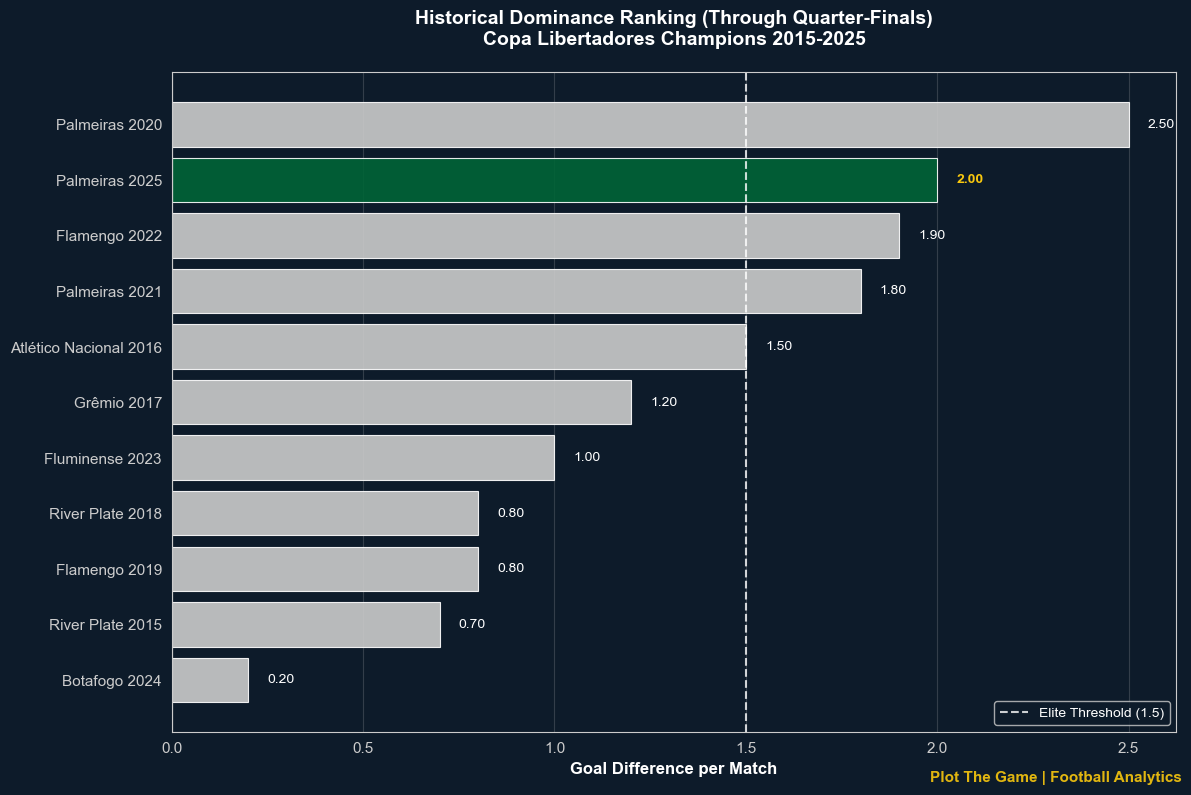

✅ Chart 1 (High Contrast) saved!


In [ ]:
# Prepare data
gd_data = gd_per_match.sort_values(ascending=True)

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create colors - Palmeiras in team green, others in GRAY
colors = [TEAM_COLOR if 'Palmeiras 2025' in campaign else PTG_LIGHT_GRAY 
          for campaign in gd_data.index]

# Create horizontal bar chart
bars = ax.barh(gd_data.index, gd_data.values, color=colors, 
               edgecolor=PTG_WHITE, linewidth=0.8, alpha=0.9)

# Add value labels - Palmeiras in YELLOW, others in white
for i, (campaign, value) in enumerate(gd_data.items()):
    if 'Palmeiras 2025' in campaign:
        color = PTG_YELLOW
        weight = 'bold'
    else:
        color = PTG_WHITE
        weight = 'normal'
    
    ax.text(value + 0.05, i, f'{value:.2f}', 
            va='center', fontweight=weight, fontsize=10, color=color)

# Styling
ax.set_xlabel('Goal Difference per Match', fontsize=12, fontweight='bold', color=PTG_WHITE)
ax.set_title('Historical Dominance Ranking (Through Quarter-Finals)\nCopa Libertadores Champions 2015-2025', 
             fontsize=14, fontweight='bold', pad=20, color=PTG_WHITE)
ax.axvline(x=0, color=PTG_LIGHT_GRAY, linewidth=0.8)
ax.axvline(x=1.5, color=PTG_WHITE, linestyle='--', linewidth=1.5, alpha=0.8, 
           label='Elite Threshold (1.5)')
ax.legend(loc='lower right', fontsize=10, facecolor=PTG_NAVY, edgecolor=PTG_LIGHT_GRAY)
ax.grid(True, alpha=0.2, axis='x')

# Golden footer branding
fig.text(0.99, 0.01, 'Plot The Game | Football Analytics', 
         ha='right', va='bottom', fontsize=11, color=PTG_YELLOW, weight='bold', alpha=0.9)

plt.tight_layout()

plt.show()

print("Chart 1 (High Contrast) saved!")

## Chart 2: Process vs Outcome (Modern Era)

**Purpose:** Validate if dominance is deserved (process) or lucky (outcome only)

**Key Message:** Palmeiras 2025 has BEST process (+1.50 xGD) with sustainable execution

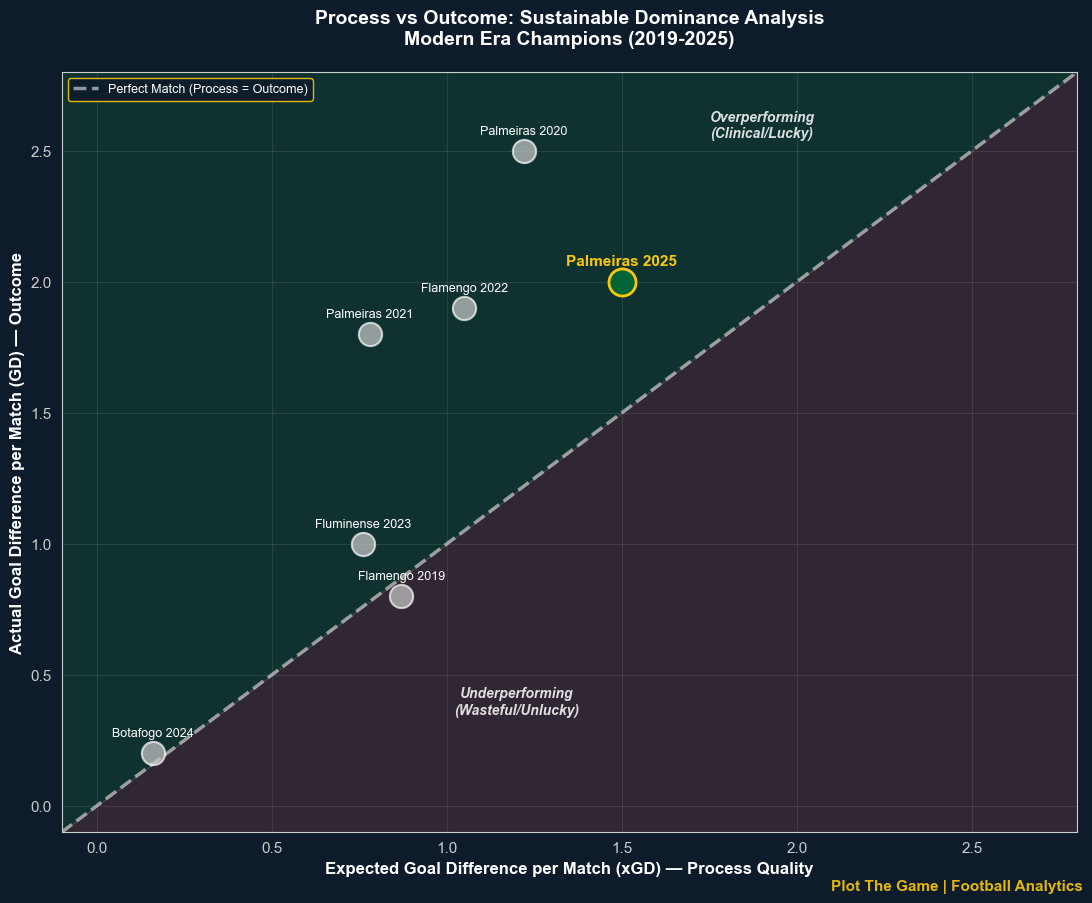

Chart 2 saved!


In [63]:
# Prepare data
modern_campaigns = df_modern_era['Champion_Year'].unique()
scatter_data = pd.DataFrame({
    'Campaign': modern_campaigns,
    'xGD': [xgd_per_match[c] for c in modern_campaigns],
    'GD': [gd_per_match[c] for c in modern_campaigns]
})

# Create figure
fig, ax = plt.subplots(figsize=(11, 9))

# FIRST: Add shaded regions (before plotting points)
min_val = -0.1
max_val = 2.8

# Overperforming region (above line) - subtle green
ax.fill_between([min_val, max_val], [min_val, max_val], max_val, 
                alpha=0.15, color=PTG_TURF_GREEN, zorder=0)

# Underperforming region (below line) - subtle red/orange
ax.fill_between([min_val, max_val], min_val, [min_val, max_val], 
                alpha=0.15, color='#FF6B6B', zorder=0)

# Perfect match line
ax.plot([min_val, max_val], [min_val, max_val], 
        color=PTG_LIGHT_GRAY, linestyle='--', linewidth=2.5, 
        alpha=0.7, label='Perfect Match (Process = Outcome)', zorder=1)

# Plot NON-Palmeiras in gray
others = scatter_data[scatter_data['Campaign'] != 'Palmeiras 2025']
ax.scatter(others['xGD'], others['GD'], 
           s=280, color=PTG_LIGHT_GRAY, alpha=0.7, 
           edgecolors=PTG_WHITE, linewidth=1.5, zorder=2)

# Palmeiras 2025 - Dark green fill + yellow border
palmeiras_data = scatter_data[scatter_data['Campaign'] == 'Palmeiras 2025']
ax.scatter(palmeiras_data['xGD'], palmeiras_data['GD'], 
           s=380, color=TEAM_COLOR, alpha=1.0,
           edgecolors=PTG_YELLOW, linewidth=2, zorder=3)

# Add labels
for idx, row in scatter_data.iterrows():
    is_palmeiras = row['Campaign'] == 'Palmeiras 2025'
    
    color = PTG_YELLOW if is_palmeiras else PTG_WHITE
    weight = 'bold' if is_palmeiras else 'normal'
    size = 11 if is_palmeiras else 9
    
    ax.annotate(row['Campaign'], 
                xy=(row['xGD'], row['GD']),
                xytext=(0, 12), textcoords='offset points',
                ha='center', fontsize=size, fontweight=weight, color=color)

# Region labels
ax.text(1.9, 2.55, 'Overperforming\n(Clinical/Lucky)', 
        fontsize=10, color=PTG_WHITE, style='italic', alpha=0.85, 
        ha='center', weight='bold')

ax.text(1.2, 0.35, 'Underperforming\n(Wasteful/Unlucky)', 
        fontsize=10, color=PTG_WHITE, style='italic', alpha=0.85, 
        ha='center', weight='bold')

# Styling
ax.set_xlabel('Expected Goal Difference per Match (xGD) — Process Quality', 
              fontsize=12, fontweight='bold', color=PTG_WHITE)
ax.set_ylabel('Actual Goal Difference per Match (GD) — Outcome', 
              fontsize=12, fontweight='bold', color=PTG_WHITE)
ax.set_title('Process vs Outcome: Sustainable Dominance Analysis\nModern Era Champions (2019-2025)', 
             fontsize=14, fontweight='bold', pad=20, color=PTG_WHITE)
ax.legend(loc='upper left', fontsize=9, facecolor=PTG_NAVY, 
          edgecolor=PTG_YELLOW, labelcolor=PTG_WHITE, framealpha=0.9)
ax.grid(True, alpha=0.12, color=PTG_LIGHT_GRAY)

# Set limits
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)

# Footer
fig.text(0.99, 0.00, 'Plot The Game | Football Analytics', 
         ha='right', va='bottom', fontsize=11, color=PTG_YELLOW, 
         weight='bold', alpha=0.9)

plt.tight_layout()

plt.show()

print("Chart 2 saved!")

## Chart 3: Expected Goal Difference Rankings

**Purpose:** Show process dominance ranking in Modern Era (2019-2025)

**Key Message:** #1 in xGD/match — highest quality of play among recent champions

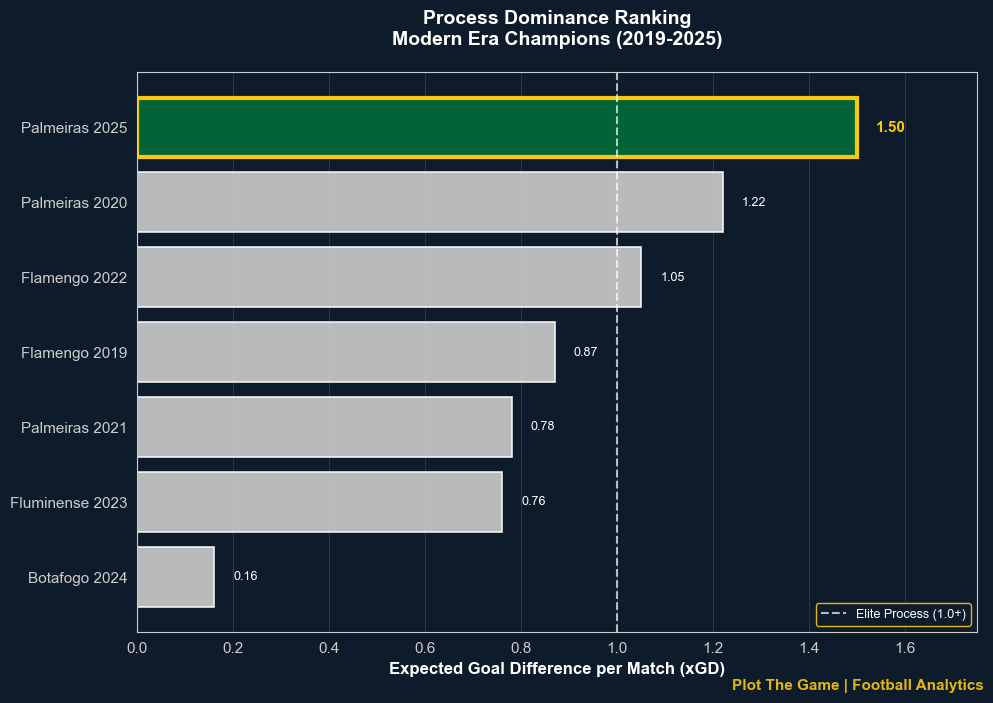

Chart 3 saved!


In [58]:
# Prepare data
xgd_data = xgd_per_match.sort_values(ascending=True)

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

# Create colors - Palmeiras in team color, others in gray
colors = [TEAM_COLOR if 'Palmeiras 2025' in campaign else PTG_LIGHT_GRAY 
          for campaign in xgd_data.index]

# Create horizontal bar chart
bars = ax.barh(xgd_data.index, xgd_data.values, color=colors, 
               edgecolor=PTG_WHITE, linewidth=1.2, alpha=0.9)

# Add yellow border to Palmeiras bar
for i, (campaign, bar) in enumerate(zip(xgd_data.index, bars)):
    if 'Palmeiras 2025' in campaign:
        bar.set_edgecolor(PTG_YELLOW)
        bar.set_linewidth(3)
        bar.set_alpha(1.0)

# Add value labels - yellow for Palmeiras, white for others
for i, (campaign, value) in enumerate(xgd_data.items()):
    if 'Palmeiras 2025' in campaign:
        color = PTG_YELLOW
        weight = 'bold'
        size = 11
    else:
        color = PTG_WHITE
        weight = 'normal'
        size = 9
    
    ax.text(value + 0.04, i, f'{value:.2f}', 
            va='center', fontweight=weight, fontsize=size, color=color)

# Styling
ax.set_xlabel('Expected Goal Difference per Match (xGD)', 
              fontsize=12, fontweight='bold', color=PTG_WHITE)
ax.set_title('Process Dominance Ranking\nModern Era Champions (2019-2025)', 
             fontsize=14, fontweight='bold', pad=20, color=PTG_WHITE)
# Set x-axis limits to give space for labels
ax.set_xlim(0, 1.75)  
ax.axvline(x=0, color=PTG_LIGHT_GRAY, linewidth=0.8)
ax.axvline(x=1.0, color=PTG_WHITE , linestyle='--', linewidth=1.5, alpha=0.7, 
           label='Elite Process (1.0+)')
ax.legend(loc='lower right', fontsize=9, facecolor=PTG_NAVY, 
          edgecolor=PTG_YELLOW, labelcolor=PTG_WHITE, framealpha=0.9)
ax.grid(True, alpha=0.15, axis='x', color=PTG_LIGHT_GRAY)

# Footer with padding
fig.text(0.99, 0.00, 'Plot The Game | Football Analytics', 
         ha='right', va='bottom', fontsize=11, color=PTG_YELLOW, 
         weight='bold', alpha=0.9)

plt.tight_layout()
plt.savefig('chart3_xgd_rankings.png', dpi=300, bbox_inches='tight', 
            facecolor=PTG_NAVY)
plt.show()
print("Chart 3 saved!")